In [13]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress a specific warning by category
warnings.filterwarnings("ignore")

## Loading of Dataset

In [14]:
df = pd.read_csv('./data/disease_insurance_price_final.csv')

In [15]:
df.shape

(1338, 15)

In [16]:
df

,age,sex,bmi,children,smoker,region,charges,disease,sedantry period,junk food consumption,alcohol consumption,exercise routine,substance use,stress level,charges_bins
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,NaN,NaN,NaN,NaN,NaN,NaN,A
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12hrs,,no,,no,,A
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2hrs,daily,rarely,frequently,,,A
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,NaN,NaN,NaN,NaN,NaN,NaN,A
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2hrs,frequently,rarely,daily,yes,,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,Gastroenteritis,4hrs,rarely,no,no,,low,A
1334,18.0,female,31.920,0,no,northeast,2205.98080,Hypoglycemia,6hrs,,rarely,,yes,low,A
1335,18.0,female,36.850,0,no,southeast,1629.83350,Hypoglycemia,6hrs,rarely,no,daily,yes,low,A
1336,21.0,female,25.800,0,no,southwest,2007.94500,Hypoglycemia,,daily,,rarely,,medium,A


In [17]:
# Assuming you have a DataFrame named 'df'
df = df.rename(columns={
    'alcohol consumption': 'alcohol_consumption',
    'sedantry period': 'sed_pd',
    'exercise routine': 'exercise_routine',
    'junk food consumption': 'junk_food_consumption',
    'stress level': 'stress_level',
    'substance use': 'substance_use'
})


In [18]:
df['sed_pd'] = df['sed_pd'].str.replace('hrs', '', regex=False)

In [19]:
df['sed_pd'] = df['sed_pd'].replace('whole day', '24')

df['sed_pd'] = pd.to_numeric(df['sed_pd'], errors='coerce').astype('Int64')
df['sed_pd'].unique()


<IntegerArray>
[<NA>, 12, 2, 24, 4, 6, 8]
Length: 7, dtype: Int64

In [20]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], right=False, labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,age_group
110,54.0,male,33.63,1,no,northwest,10825.2537,Gastroenteritis,12,rarely,frequently,,,medium,A,Middle-aged
144,30.0,male,28.69,3,yes,northwest,20745.9891,Dengue,<NA>,NaN,NaN,NaN,NaN,NaN,A,Adult
494,21.0,male,25.70,4,yes,southwest,17942.1060,Dengue,<NA>,NaN,NaN,NaN,NaN,NaN,A,Young
1174,29.0,male,32.11,2,no,northwest,4433.9159,Hypoglycemia,2,,rarely,daily,yes,medium,A,Adult
803,18.0,female,42.24,0,yes,southeast,38792.6856,Paroxysmal Positional Vertigo (Vertigo),<NA>,NaN,NaN,NaN,NaN,NaN,B,Young


In [21]:
df['exercise_routine'].unique()

array([nan, ' ', 'frequently', 'daily', 'rarely', 'no'], dtype=object)

### Label Encoding of non-null columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

labeled = ['disease']
onehot = ['region']

transformer = ColumnTransformer([
    ('Label Encoding Disease', OrdinalEncoder(), labeled),
    ('Onehot Encoding', OneHotEncoder(drop='first', sparse_output=False), onehot)
    ], remainder = 'passthrough')

transformed = transformer.fit_transform(df)
# temp = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [25]:
input_is = df.columns.tolist()

In [31]:
set(input_is) - set(['charges_bins','charges']) - set(['age','age_group'])

{'alcohol_consumption',
 'bmi',
 'children',
 'disease',
 'exercise_routine',
 'junk_food_consumption',
 'region',
 'sed_pd',
 'sex',
 'smoker',
 'stress_level',
 'substance_use'}

In [12]:
df

,age,sex,bmi,children,smoker,region,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,age_group
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,<NA>,NaN,NaN,NaN,NaN,NaN,A,Young
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12,,no,,no,,A,NaN
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2,daily,rarely,frequently,,,A,Adult
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,<NA>,NaN,NaN,NaN,NaN,NaN,A,Adult
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2,frequently,rarely,daily,yes,,A,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,Gastroenteritis,4,rarely,no,no,,low,A,Middle-aged
1334,18.0,female,31.920,0,no,northeast,2205.98080,Hypoglycemia,6,,rarely,,yes,low,A,Young
1335,18.0,female,36.850,0,no,southeast,1629.83350,Hypoglycemia,6,rarely,no,daily,yes,low,A,Young
1336,21.0,female,25.800,0,no,southwest,2007.94500,Hypoglycemia,<NA>,daily,,rarely,,medium,A,Young


In [ ]:
gender_label_encoder = LabelEncoder()
alcohol_label_encoder = LabelEncoder()
exercise_label_encoder = LabelEncoder()
sed_pd_label_encoder = LabelEncoder()
junk_label_encoder = LabelEncoder()
smoker_label_encoder = LabelEncoder()
stress_label_encoder = LabelEncoder()
subs_label_encoder = LabelEncoder()
age_group_label_encoder = LabelEncoder()

In [ ]:
new_column_names = [col.split('__')[-1] for col in transformer.get_feature_names_out()]
new_column_names = [col.split('region_')[-1] for col in new_column_names]
new_column_names

In [ ]:
temp = pd.DataFrame(transformed, columns=new_column_names)

In [ ]:
temp['age_group'] = pd.cut(temp['age'], bins=[0, 25, 40, 60, temp['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [ ]:
temp = temp[['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 
              'disease', 'sed_pd', 'junk_food_consumption', 
              'alcohol_consumption', 'exercise_routine', 'substance_use', 
              'stress_level', 'charges_bins', 'northwest', 
              'southeast', 'southwest', 'age_group']]

The output of skew() function indicates that the it is close to 0 which means its symmetrical aka normally distributed similarly, we can observed the symmetric distribution of age in KDE plot

#### For categoric columns

In [56]:
df['sed_pd'].unique()

<IntegerArray>
[<NA>, 12, 2, 24, 4, 6, 8]
Length: 7, dtype: Int64

Here the sed period is converted to numeric where while day is mapped to 24. All the other value which cannot be converted to int such as ' ' and nan is converted to nan

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming 'sed_ped' and 'alcohol_consumption' are the columns with missing values
# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the specified columns
df[['sed_pd']] = imputer.fit_transform(df[['sed_pd']])


Iterative imputer has been used for sedantery period nan values as it displays non-linear relationship with other columns and sedantery period is not something to captured by the statistical methods but can be predicted by a person's bmi or age group

In [58]:
df.isna().sum()

age                        0
sex                        0
bmi                        0
children                   0
smoker                     0
charges                    0
disease                    0
sed_pd                     0
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               0
northwest                  0
southeast                  0
southwest                  0
age_group                  1
dtype: int64

In [59]:
columns_to_impute = ['alcohol_consumption', 'junk_food_consumption', 'exercise_routine', 'substance_use', 'stress_level']

# Convert empty strings to NaN
df[columns_to_impute] = df[columns_to_impute].replace(' ', np.nan)

# Create a SimpleImputer instance with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [60]:
df.isna().sum()

age                      0
sex                      0
bmi                      0
children                 0
smoker                   0
charges                  0
disease                  0
sed_pd                   0
junk_food_consumption    0
alcohol_consumption      0
exercise_routine         0
substance_use            0
stress_level             0
charges_bins             0
northwest                0
southeast                0
southwest                0
age_group                1
dtype: int64

### Handling null in age group

In [61]:
df.loc[df['age'].isna(), 'age_group'] = pd.cut(df.loc[df['age'].isna(), 'age'], bins=[0, 25, 40, 60, df['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

### Label Encoding

In [62]:
# Initiating the label encoders
gender_label_encoder = LabelEncoder()
alcohol_label_encoder = LabelEncoder()
exercise_label_encoder = LabelEncoder()
sed_pd_label_encoder = LabelEncoder()
junk_label_encoder = LabelEncoder()
smoker_label_encoder = LabelEncoder()
stress_label_encoder = LabelEncoder()
subs_label_encoder = LabelEncoder()
age_group_label_encoder = LabelEncoder()


# Fit and transform the columns of X_train
df['sex'] = gender_label_encoder.fit_transform(df['sex'])
df['alcohol_consumption'] = alcohol_label_encoder.fit_transform(df['alcohol_consumption'])
df['exercise_routine'] = exercise_label_encoder.fit_transform(df['exercise_routine'])
df['sed_pd'] = sed_pd_label_encoder.fit_transform(df['sed_pd'])
df['junk_food_consumption'] = junk_label_encoder.fit_transform(df['junk_food_consumption'])
df['smoker'] = smoker_label_encoder.fit_transform(df['smoker'])
df['stress_level'] = stress_label_encoder.fit_transform(df['stress_level'])
df['substance_use'] = subs_label_encoder.fit_transform(df['substance_use'])
df['age_group'] = age_group_label_encoder.fit_transform(df['age_group'])


The disease column has been label encoded even though there is no ordinal relationship among them as they number of unqiue diseases are very high (32) so the number of columns of our dataframe will be very big and ugly and may impact in efficiency of model. The other columns are label encoded as they have an ordinality among them such as Male/Female, rarely/daily and so on

In [63]:
df.head()

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.000000,0,27.900,0,1,16884.92400,6,4,2,2,0,0,2,0,0.0,0.0,1.0,3
1,39.222887,1,33.770,1,0,1725.55230,20,5,2,2,0,0,2,0,0.0,1.0,0.0,4
2,28.000000,1,33.000,3,0,4449.46200,20,0,0,3,1,0,2,0,0.0,1.0,0.0,0
3,33.000000,1,22.705,0,0,21984.47061,8,4,2,2,0,0,2,0,1.0,0.0,0.0,0
4,32.000000,1,28.880,0,0,3866.85520,20,0,1,3,0,1,2,0,1.0,0.0,0.0,0


In [64]:
df.head()

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.000000,0,27.900,0,1,16884.92400,6,4,2,2,0,0,2,0,0.0,0.0,1.0,3
1,39.222887,1,33.770,1,0,1725.55230,20,5,2,2,0,0,2,0,0.0,1.0,0.0,4
2,28.000000,1,33.000,3,0,4449.46200,20,0,0,3,1,0,2,0,0.0,1.0,0.0,0
3,33.000000,1,22.705,0,0,21984.47061,8,4,2,2,0,0,2,0,1.0,0.0,0.0,0
4,32.000000,1,28.880,0,0,3866.85520,20,0,1,3,0,1,2,0,1.0,0.0,0.0,0


## Modelling

### Feature selection

In [ ]:
X = df.drop(['charges_bins', 'charges'], axis=1)
y = df['charges_bins']

### Splitting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled =scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### ML FLow

In [85]:
import mlflow



MlflowException: API request to https://mlflow.cs.ait.ac.th/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPSConnectionPool(host='mlflow.cs.ait.ac.th', port=443): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=medical-insurance-group-6 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1002)')))

In [86]:
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
mlflow.set_experiment(experiment_name="medical-insurance-group-6")

MlflowException: API request to https://mlflow.cs.ait.ac.th/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPSConnectionPool(host='mlflow.cs.ait.ac.th', port=443): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=medical-insurance-group-6 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1002)')))

### K-Fold

In [75]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [76]:
classifiers = {
    'RandomForest': (RandomForestClassifier(class_weight='balanced', random_state=42), {'n_estimators': [50, 100, 200]}),
    'XGBoost': (xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False), {'scale_pos_weight': [1.0, 2.0]}),
    'LogisticRegression': (LogisticRegression(class_weight='balanced', multi_class='auto', random_state=42, max_iter=1000), {'C': [0.1, 1.0, 10.0]}),
    'SVM': (SVC(class_weight='balanced', random_state=42), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'DecisionTree': (DecisionTreeClassifier(class_weight='balanced', random_state=42), {'max_depth': [None, 5, 10]})
}

In [77]:
scorer = make_scorer(accuracy_score)

# Perform k-fold cross-validation separately for each classifier
best_classifiers_kfold = {}
for name, (classifier, param_grid) in classifiers.items():
    # Specify the number of folds for cross-validation (e.g., k=5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform k-fold cross-validation
    cross_val_results = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring=scorer)
    
    # Print cross-validation results for inspection
    print(f'{name} - Cross-Validation Results: {cross_val_results}')

RandomForest - Cross-Validation Results: [0.93925234 0.95327103 0.96728972 0.96261682 0.94392523]
XGBoost - Cross-Validation Results: [0.95794393 0.9953271  0.99065421 0.99065421 0.97196262]
LogisticRegression - Cross-Validation Results: [0.78504673 0.8364486  0.80841121 0.79439252 0.74766355]
SVM - Cross-Validation Results: [0.8411215  0.8317757  0.85046729 0.8364486  0.84579439]
KNN - Cross-Validation Results: [0.88785047 0.89719626 0.93457944 0.89252336 0.89719626]
DecisionTree - Cross-Validation Results: [0.95327103 0.96261682 0.97663551 0.96728972 0.95794393]


### Grid Search CV

In [79]:
best_classifiers_grid = {}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the best parameters and the corresponding score
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Best cross-validated accuracy for {name}: {grid_search.best_score_}')
    
    # Save the best classifier in the dictionary
    best_classifiers_grid[name] = grid_search.best_estimator_

Best parameters for RandomForest: {'n_estimators': 50}
Best cross-validated accuracy for RandomForest: 0.9560747663551401


/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [04:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [04:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [04:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [04:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [04:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weigh

Best parameters for XGBoost: {'scale_pos_weight': 1.0}
Best cross-validated accuracy for XGBoost: 0.9813084112149533
Best parameters for LogisticRegression: {'C': 0.1}
Best cross-validated accuracy for LogisticRegression: 0.8093457943925234
Best parameters for SVM: {'C': 10.0, 'kernel': 'rbf'}
Best cross-validated accuracy for SVM: 0.8822429906542057
Best parameters for KNN: {'n_neighbors': 7}
Best cross-validated accuracy for KNN: 0.9074766355140188
Best parameters for DecisionTree: {'max_depth': None}
Best cross-validated accuracy for DecisionTree: 0.9542056074766355


### Classification report

In [80]:
# Set up the scorer
scorer = make_scorer(accuracy_score)

# Specify the XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, scale_pos_weight=1.0)

# Specify the number of folds for cross-validation (e.g., k=5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_results = cross_val_score(xgboost_classifier, X_train_scaled, y_train, cv=kfold, scoring=scorer)

# Get cross-validated predictions
y_pred_cv = cross_val_predict(xgboost_classifier, X_train_scaled, y_train, cv=kfold)

# Calculate and print the accuracy
accuracy = accuracy_score(y_train, y_pred_cv)
print(f'XGBoost - Cross-Validation Accuracy: {accuracy}')

# Calculate and print the classification report
report = classification_report(y_train, y_pred_cv)
print('XGBoost - Classification Report:')
print(report)


XGBoost - Cross-Validation Accuracy: 0.9813084112149533
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.93      0.93      0.93       143
           2       0.94      0.82      0.88        40

    accuracy                           0.98      1070
   macro avg       0.95      0.92      0.93      1070
weighted avg       0.98      0.98      0.98      1070



## Testing

XGBoost - Cross-Validation Accuracy: 0.9813084112149533
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.93      0.93      0.93       143
           2       0.94      0.82      0.88        40

    accuracy                           0.98      1070
   macro avg       0.95      0.92      0.93      1070
weighted avg       0.98      0.98      0.98      1070



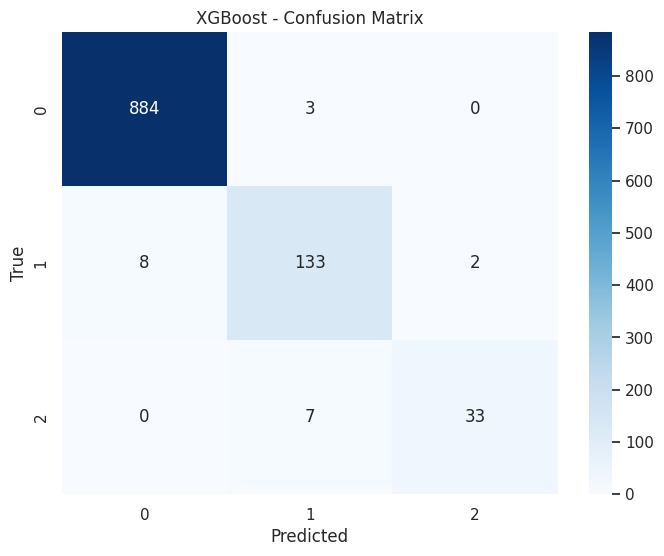

In [81]:
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_train, y_pred_cv)
print(f'XGBoost - Cross-Validation Accuracy: {accuracy}')

# Calculate and print the classification report
report = classification_report(y_train, y_pred_cv)
print('XGBoost - Classification Report:')
print(report)

class_labels = np.unique(y_train)

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_cv)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Feature Importance

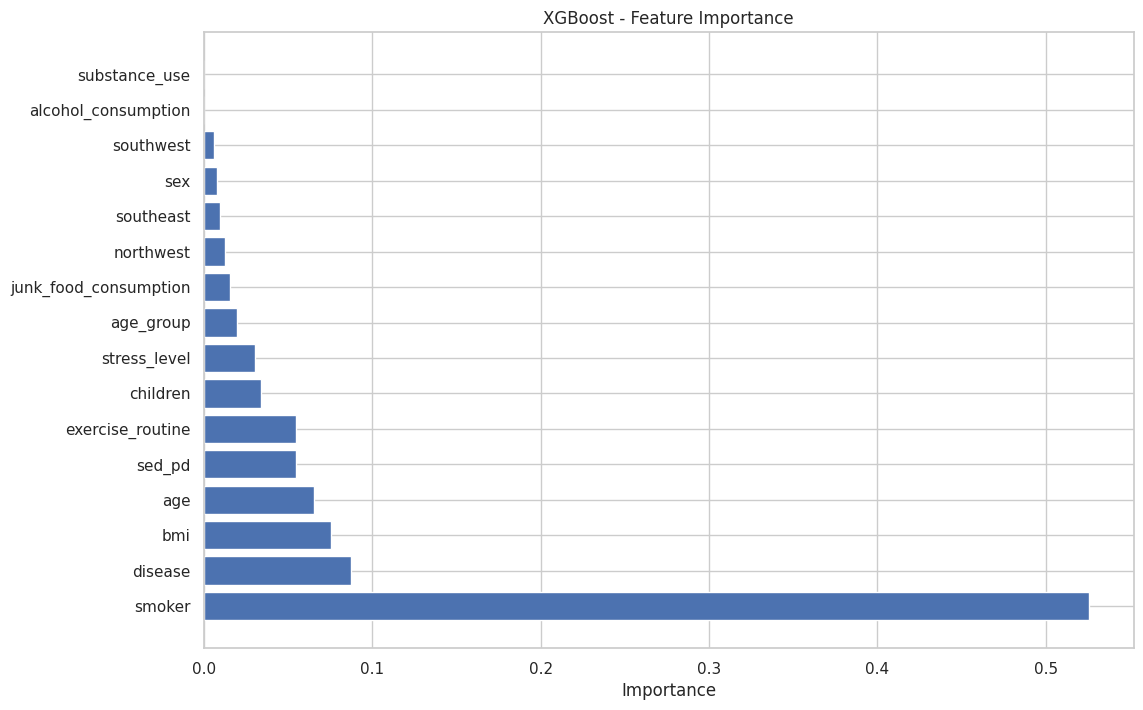

In [82]:
# Specify the XGBoost classifier with the best parameters
xgboost_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, scale_pos_weight=1.0)

# Fit the classifier to the training data
xgboost_classifier.fit(X_train, y_train)

# Get feature importance
feature_importances = xgboost_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Feature Importance')
plt.show()


According to the feature imprtance graph the feature smoke/ disease and bmi appear to have the biggest feature importance while predicting insurance cost

## Cluster based analysis for age-range and insurance_class

In [83]:
df['age_group'].unique()

array([3, 4, 0, 1, 2])

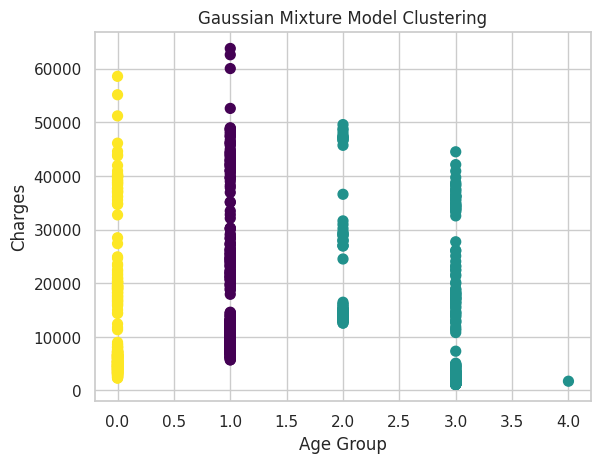

In [84]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'age_group' and 'charges'
df['age_group'] = df['age_group'].astype(int)  # Convert age_group to integers

X = df['age_group'].values.reshape(-1, 1)

# Experiment with different numbers of components
n_components = 3  # Adjust this value
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(X)

# Predict labels
y_gmm = gmm.predict(X)

# Create a colormap based on the number of components
colors = plt.cm.viridis(np.linspace(0, 1, n_components))

# Scatter plot with customized colors
plt.scatter(df['age_group'], df['charges'], c=colors[y_gmm], s=50)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.title('Gaussian Mixture Model Clustering')
plt.show()
